# **Task 3**

**Fashion MNIST dataset with neural network by using numpy**

Importing dataset and applying preprocessing

In [1]:
import pandas as pd
import numpy as np


np.random.seed(42)
data = pd.read_csv('fashion-mnist_train.csv')
print(data.shape)
data = data.sample(frac=1)
print(data[['label']].groupby('label').size().reset_index())

one_hot = pd.get_dummies(data['label'].unique())
one_hot['label'] = one_hot.index

data = pd.merge(data,one_hot)
#data = data.drop('label',axis=1)
data = data.sample(frac=1)

data_train = data
data_test = pd.read_csv('fashion-mnist_test.csv')
data_test = pd.merge(data_test,one_hot)
data_train.drop('label',axis=1,inplace=True)

data_test.drop('label',axis=1,inplace=True)

## Create the train and test set
X_train = np.array(data_train.drop([0,1,2,3,4,5,6,7,8,9],axis=1).values)/255
y_train = np.array(data_train[[0,1,2,3,4,5,6,7,8,9]].values)
X_test = np.array(data_test.drop([0,1,2,3,4,5,6,7,8,9],axis=1).values)/255
y_test = np.array(data_test[[0,1,2,3,4,5,6,7,8,9]].values)

(60000, 785)
   label     0
0      0  6000
1      1  6000
2      2  6000
3      3  6000
4      4  6000
5      5  6000
6      6  6000
7      7  6000
8      8  6000
9      9  6000


Implementing sigmoid and softmax and defining all the necessary parameters of neural network

In [2]:
X_train = X_train.T
y_train = y_train.T
print(X_train.shape)
print(y_train.shape)
X_test = X_test.T
y_test = y_test.T

def sigmoid(x):
    return(1./(1+np.exp(-x)))

def softmax(x): 
    """Compute softmax values for each sets of scores in x.""" 

    e_x = np.exp(x - np.max(x)) 

    return (e_x / e_x.sum(axis=0)) 

import random
random.seed(42)
w1 = np.random.rand(128,784)/np.sqrt(784)
b0 = np.zeros((128,1))/np.sqrt(784)
w2 = np.random.rand(10,128)/np.sqrt(128)
b1 = np.zeros((10,1))/np.sqrt(128)
loss=[]
batches = 1000

lr = 0.1
batch_size = 200
beta = 0.9
count = 0
epochs = 25

(784, 60000)
(10, 60000)


Forward and backward pass with relevant loss function and optimiser and running the neural network to notice the accuracy on defined epochs

In [14]:
loss_weight_dict = {
    
}
### Forward Pass
for i in range(epochs):
#     if i%100==0:
#         print('Epoch :',i)
    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = y_train[:, permutation]
    
    for j in range(batches):
        
        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        if begin>end:
            continue
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin
        x1 = sigmoid(w1@X+b0)
        x2 = softmax(w2@x1+b1)
        delta_2 = (x2-Y)
        delta_1 = np.multiply(w2.T@delta_2, np.multiply(x1,1-x1))
        if i==0 :
            dW1 = delta_1@X.T
            dW2 = delta_2@x1.T
            db0 = np.sum(delta_1,axis=1,keepdims=True)
            db1 = np.sum(delta_2,axis=1,keepdims=True)
        else:
            dW1_old = dW1
            dW2_old = dW2
            db0_old = db0
            db1_old = db1
            dW1 = delta_1@X.T
            dW2 = delta_2@x1.T
            db0 = np.sum(delta_1,axis=1,keepdims=True)
            db1 = np.sum(delta_2,axis=1,keepdims=True)
            ## Using the past gradients to calculate the present gradients
            dW1 = (beta * dW1_old + (1. - beta) * dW1)
            db0 = (beta * db0_old + (1. - beta) * db0)
            dW2 = (beta * dW2_old + (1. - beta) * dW2)
            db1 = (beta * db1_old + (1. - beta) * db1)


        w1 = w1 - (1./m_batch)*(dW1)*lr
        b0 = b0 - (1./m_batch)*(db0)*(lr)
        w2 = w2 - (1./m_batch)*(dW2)*lr
        b1 = b1 - (1./m_batch)*(db1)*(lr)
    
    x1 = sigmoid(w1@X_train+b0)
    x2_train = softmax(w2@x1+b1)
    x2_train_df = pd.DataFrame(x2_train)
    x2_train_df = (x2_train_df == x2_train_df.max()).astype(int)
    x2_train_df = x2_train_df.transpose()
    x2_train_df = pd.merge(x2_train_df,one_hot)
    x2_train_df = x2_train_df[['label']]
    y_train_df = pd.merge(pd.DataFrame(y_train.T),one_hot)
    x2_train_df['label_actual'] = y_train_df['label']
    train_accuracy = np.sum(x2_train_df['label_actual']==x2_train_df['label'])/x2_train_df.shape[0]

    
#     print('Training Loss...')
#     print(-np.mean(np.multiply(y_train,np.log(x2))))
    add_loss = {
        'loss' : -np.mean(np.multiply(y_train,np.log(x2_train))),
        'weight_1' : w1,
        'weight_2':w2,
        'b0' : b0,
        'b1': b1,
        'train_accuracy': train_accuracy
    }
    
    
    
    
    
    x1 = sigmoid(w1@X_test+b0)
    x2_test = softmax(w2@x1+b1)
    x2_test_df = pd.DataFrame(x2_test)
    x2_test_df = (x2_test_df == x2_test_df.max()).astype(int)
    x2_test_df = x2_test_df.transpose()
    x2_test_df = pd.merge(x2_test_df,one_hot)
    x2_test_df = x2_test_df[['label']]
    y_test_df = pd.merge(pd.DataFrame(y_test.T),one_hot)
    x2_test_df['label_actual'] = y_test_df['label']
    test_accuracy = np.sum(x2_test_df['label_actual']==x2_test_df['label'])/x2_test_df.shape[0]
    print('Epoch: ',i)

    print('Testing Accuracy :',test_accuracy)
    print('Training Accuracy :',train_accuracy)
    print('----------------------------------------')
    
    
    
#     print('Testing Loss...')
#     print(-np.mean(np.multiply(y_test,np.log(x2))))
    
    add_loss['testing_loss'] = -np.mean(np.multiply(y_test,np.log(x2_test)))
    add_loss['test_accuracy'] = test_accuracy
    loss_weight_dict[count] = add_loss
    count = count + 1

Epoch:  0
Testing Accuracy : 0.2
Training Accuracy : 0.22213333333333332
----------------------------------------
Epoch:  1
Testing Accuracy : 0.3264
Training Accuracy : 0.1991
----------------------------------------
Epoch:  2
Testing Accuracy : 0.2023
Training Accuracy : 0.13721666666666665
----------------------------------------
Epoch:  3
Testing Accuracy : 0.2683
Training Accuracy : 0.18866666666666668
----------------------------------------
Epoch:  4
Testing Accuracy : 0.2405
Training Accuracy : 0.5350833333333334
----------------------------------------
Epoch:  5
Testing Accuracy : 0.2375
Training Accuracy : 0.5619833333333333
----------------------------------------
Epoch:  6
Testing Accuracy : 0.2964
Training Accuracy : 0.6157166666666667
----------------------------------------
Epoch:  7
Testing Accuracy : 0.305
Training Accuracy : 0.6490333333333334
----------------------------------------
Epoch:  8
Testing Accuracy : 0.315
Training Accuracy : 0.6442666666666667
-----------

Visualisation of training and testing accuracy 

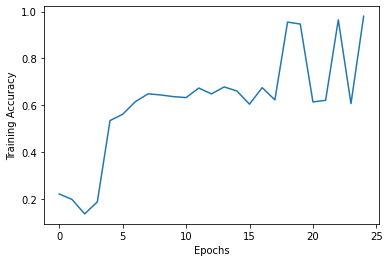

In [ ]:
train_accuracy = []

for i in range(len(loss_weight_dict)):
    train_accuracy.append(loss_weight_dict[i]['train_accuracy'])
import matplotlib.pyplot as plt
plt.plot(train_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.show()

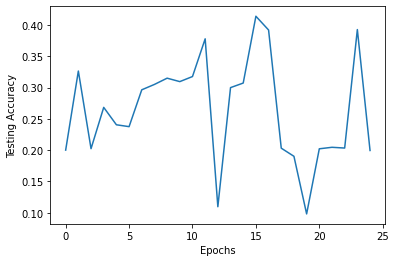

In [ ]:
test_accuracy = []

for i in range(len(loss_weight_dict)):
    test_accuracy.append(loss_weight_dict[i]['test_accuracy'])
import matplotlib.pyplot as plt
plt.plot(test_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Testing Accuracy')
plt.show()

performance and final result of neural network on fashion mnsit dataset

In [ ]:
index_max = test_accuracy.index(max(test_accuracy))
weight_1 = loss_weight_dict[index_max]['weight_1']
weight_2 = loss_weight_dict[index_max]['weight_2']
b0 = loss_weight_dict[index_max]['b0']
b1 = loss_weight_dict[index_max]['b1']
test_data = pd.read_csv('/content/drive/My Drive/Dataset/fashion-mnist_test.csv')
test_data_mod = pd.merge(test_data,one_hot)
test_data_algo = test_data_mod.drop(['label',0,1,2,3,4,5,6,7,8,9],axis=1)
test_vector = np.array(test_data_algo.values)
test_vector = test_vector.T
test_vector = test_vector/255
x1 = sigmoid(weight_1@test_vector+b0)
x2 = softmax(weight_2@x1+b1)
x2_df = pd.DataFrame(x2)
x2_df = (x2_df == x2_df.max()).astype(int)
x2_df = x2_df.transpose()
x2_df = pd.merge(x2_df,one_hot)
x2_df['label_actual'] = test_data_mod['label']
print('Test Accuracy :',np.sum(x2_df['label_actual']==x2_df['label'])/x2_df.shape[0])

Test Accuracy : 0.414


# **Task 4**

**CIFAR-10 dataset with neural network by using pytorch**

Importing libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Importing CIFAR-10 dataset

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Analysing the classes of dataset

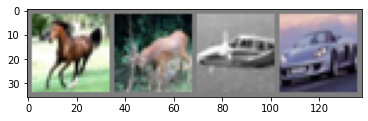

horse deer  plane car  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Defining neural network by pytorch
with convo and maxpooling and relu activation function


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Defining the loss function and appropriate optimiser (SGD)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Running the epochs onto the input training data

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.186
[1,  4000] loss: 1.880
[1,  6000] loss: 1.664
[1,  8000] loss: 1.569
[1, 10000] loss: 1.514
[1, 12000] loss: 1.462
[2,  2000] loss: 1.397
[2,  4000] loss: 1.402
[2,  6000] loss: 1.359
[2,  8000] loss: 1.325
[2, 10000] loss: 1.314
[2, 12000] loss: 1.299
Finished Training


Saving the model of that neural network

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Predicting the labels of images with that model

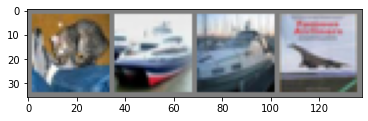

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Using that saved model and testing it on 10000 images from test data and we have gotten the accuracy on test data

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


Accuracy of individual test classes of the data

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 52.0 %
Accuracy for class: car   is 68.6 %
Accuracy for class: bird  is 41.6 %
Accuracy for class: cat   is 54.4 %
Accuracy for class: deer  is 43.6 %
Accuracy for class: dog   is 49.0 %
Accuracy for class: frog  is 57.3 %
Accuracy for class: horse is 55.8 %
Accuracy for class: ship  is 75.4 %
Accuracy for class: truck is 48.4 %
